# Import dependencies

In [ ]:
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
%matplotlib inline
from scipy.io import wavfile
import os
import numpy as np
from tqdm import tqdm

# Dataset import

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Urban_sound/dataset/UrbanSound8K/metadata/UrbanSound8K.csv')

In [ ]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


from matplotlib import pyplot as plt
df['fsID'].plot(kind='hist', bins=20, title='fsID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['start'].plot(kind='hist', bins=20, title='start')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['end'].plot(kind='hist', bins=20, title='end')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['salience'].plot(kind='hist', bins=20, title='salience')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='fsID', y='start', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='start', y='end', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='end', y='salience', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='salience', y='fold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['fsID'].plot(kind='line', figsize=(8, 4), title='fsID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['start'].plot(kind='line', figsize=(8, 4), title='start')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['end'].plot(kind='line', figsize=(8, 4), title='end')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['salience'].plot(kind='line', figsize=(8, 4), title='salience')
plt.gca().spines[['top', 'right']].set_visible(False)

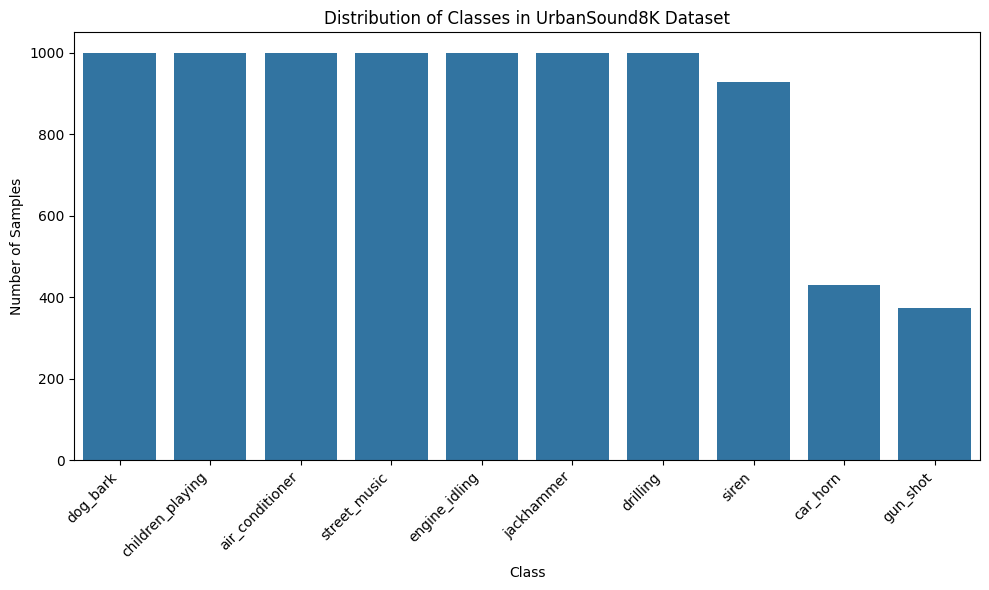

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the class counts
class_counts = df['class'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Classes in UrbanSound8K Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Class level

In [ ]:
df['classID'].unique()

array([3, 2, 1, 0, 9, 6, 8, 5, 7, 4])

In [ ]:
df['class'].value_counts()

,count
class,
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
engine_idling,1000
jackhammer,1000
drilling,1000
siren,929
car_horn,429


# Feature Extraction ----> MFCC

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features = []
for index_num, row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath('/content/drive/MyDrive/Urban_sound/dataset/UrbanSound8K/audio/'), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3555it [21:22,  3.06it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [49:05,  2.98it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [49:06,  3.09it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [51:19,  2.84it/s]


# Generate dataset on feature & class

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(9)

,feature,class
0,"[-211.93698, 62.58121, -122.813156, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995583, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.57807, 43.195866, ...",children_playing
3,"[-406.47922, 91.1966, -25.043552, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658783, 50.690285,...",children_playing
5,"[-441.0859, 108.92061, -25.777704, 47.518364, ...",children_playing
6,"[-469.41965, 109.28011, -18.45655, 46.043015, ...",children_playing
7,"[-457.14645, 106.52766, -19.124525, 39.871788,...",children_playing
8,"[-466.2641, 118.13225, -29.881447, 50.494637, ...",children_playing


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

# Train Shape

In [ ]:
# shape of features
X.shape

(8732, 40)

In [ ]:
y.shape

(8732,)

In [ ]:
## train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state = 42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the class labels as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(extracted_features_df['class'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the encoded labels
print("Encoded labels:", np.unique(y))

Encoded labels: [0 1 2 3 4 5 6 7 8 9]


# DNN Network
## Test accuracy:82%
### model save:'/content/drive/MyDrive/Urban_sound/models/cnn.keras'

In [ ]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(40,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,914 (62.16 KB)

 Trainable params: 15,914 (62.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1142 - loss: 12.1657 - val_accuracy: 0.1065 - val_loss: 2.2741
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1237 - loss: 2.4722 - val_accuracy: 0.1276 - val_loss: 2.2614
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1231 - loss: 2.3115 - val_accuracy: 0.1339 - val_loss: 2.2471
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1430 - loss: 2.2682 - val_accuracy: 0.1540 - val_loss: 2.2151
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1307 - loss: 2.2601 - val_accuracy: 0.1660 - val_loss: 2.1944
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1490 - loss: 2.2163 - val_accuracy: 0.1786 - val_loss: 2.1556
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1746 - loss: 2.1814 - val_accuracy: 0.2141 - val_loss: 2.0777
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1956 - loss: 2.1283 - val_accuracy: 0

In [ ]:
import os

# Define the file path where you want to save the model
model_save_path = '/content/drive/MyDrive/Urban_sound/models/cnn.keras'

# Create the directory if it does not exist
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the entire model
model.save(model_save_path)
print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Urban_sound/models/cnn.keras


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


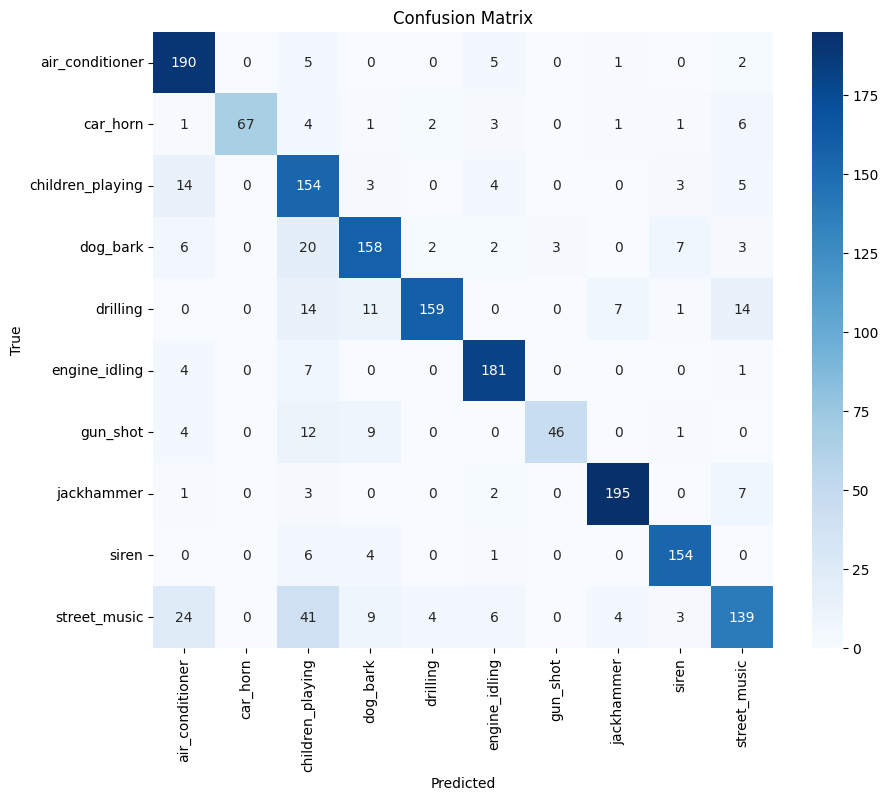

Classification Report:
                  precision    recall  f1-score   support

 air_conditioner       0.78      0.94      0.85       203
        car_horn       1.00      0.78      0.88        86
children_playing       0.58      0.84      0.69       183
        dog_bark       0.81      0.79      0.80       201
        drilling       0.95      0.77      0.85       206
   engine_idling       0.89      0.94      0.91       193
        gun_shot       0.94      0.64      0.76        72
      jackhammer       0.94      0.94      0.94       208
           siren       0.91      0.93      0.92       165
    street_music       0.79      0.60      0.68       230

        accuracy                           0.83      1747
       macro avg       0.86      0.82      0.83      1747
    weighted avg       0.84      0.83      0.83      1747



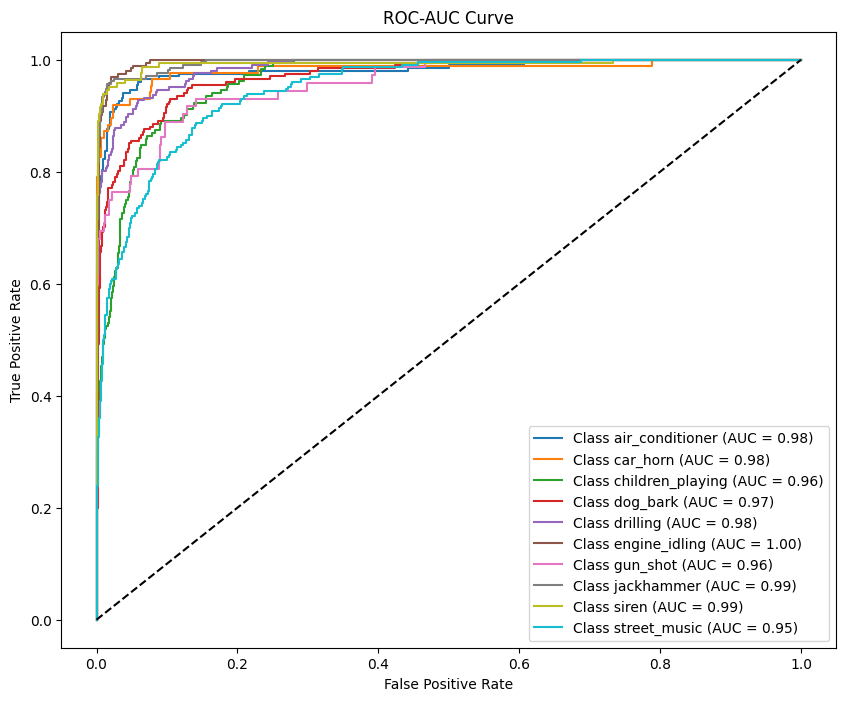

In [ ]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model

model_cnn = load_model('/content/drive/MyDrive/Urban_sound/models/cnn.keras')
# Assuming `model` is your trained model
# Predict the classes on the test set
y_pred = model_cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report with F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Plot ROC-AUC Curve
# Binarize the labels for multi-class ROC-AUC
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot each class ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

# CNN
## Test accuracy:74%
### model save :/content/drive/MyDrive/Urban_sound/models/best_model.keras



In [ ]:
# Reshape X to 4D for Conv2D input
X_train_cnn = X_train.reshape(X_train.shape[0], 40, 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 40, 1, 1)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input, GlobalAveragePooling2D, add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Reshape X to 4D for Conv2D input
X_train_cnn = X_train.reshape(X_train.shape[0], 40, 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 40, 1, 1)

# Model architecture with residual connections
input_layer = Input(shape=(40, 1, 1))

# First Conv Block
x = Conv2D(32, (3, 1), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 1), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 1))(x)
x = Dropout(0.3)(x)

# Second Conv Block with residual connection
residual = Conv2D(64, (1, 1), padding='same')(x)
x = Conv2D(64, (3, 1), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 1), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = add([x, residual])  # Add residual connection
x = MaxPooling2D(pool_size=(2, 1))(x)
x = Dropout(0.4)(x)

# Third Conv Block with residual connection
residual = Conv2D(128, (1, 1), padding='same')(x)
x = Conv2D(128, (3, 1), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 1), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = add([x, residual])  # Add residual connection
x = MaxPooling2D(pool_size=(2, 1))(x)
x = Dropout(0.4)(x)

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Dense Layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(10, activation='softmax')(x)  # Adjust for the number of classes

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the file path to save the best model
best_model_save_path = '/content/drive/MyDrive/Urban_sound/models/best_model.keras'

# Create the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(
    best_model_save_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model with the checkpoint callback
history = model.fit(
    X_train_cnn, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    callbacks=[checkpoint]
)

# Evaluate the best saved model
best_model = tf.keras.models.load_model(best_model_save_path)
loss, accuracy = best_model.evaluate(X_test_cnn, y_test)
print(f"Best Model Test Loss: {loss}")
print(f"Best Model Test Accuracy: {accuracy}")


Epoch 1/100
216/219 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1155 - loss: 3.2055
Epoch 1: val_accuracy improved from -inf to 0.15226, saving model to /content/drive/MyDrive/Urban_sound/models/best_model.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.1154 - loss: 3.1996 - val_accuracy: 0.1523 - val_loss: 2.2343
Epoch 2/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1308 - loss: 2.4473
Epoch 2: val_accuracy improved from 0.15226 to 0.23412, saving model to /content/drive/MyDrive/Urban_sound/models/best_model.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.1308 - loss: 2.4471 - val_accuracy: 0.2341 - val_loss: 2.2151
Epoch 3/100
216/219 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1390 - loss: 2.3391
Epoch 3: val_accuracy improved from 0.23412 to 0.26102, saving model to /content/drive/MyDrive/Urban_sound/models/best_model.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.1391 - loss: 2.3389 - val_accuracy: 0.2610 - val_loss

# Dialed CNN
# test accuracy:78%

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input, GlobalAveragePooling2D, add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Reshape X to 4D for Conv2D input
X_train_cnn = X_train.reshape(X_train.shape[0], 40, 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 40, 1, 1)

# Model architecture with residual connections and dilated convolutions
input_layer = Input(shape=(40, 1, 1))

# First Conv Block
x = Conv2D(32, (3, 1), activation='relu', padding='same', dilation_rate=(1, 1))(input_layer)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 1), activation='relu', padding='same', dilation_rate=(1, 1))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 1))(x)
x = Dropout(0.3)(x)

# Second Conv Block with residual connection
residual = Conv2D(64, (1, 1), padding='same')(x)
x = Conv2D(64, (3, 1), activation='relu', padding='same', dilation_rate=(2, 1))(x)  # Dilated convolution
x = BatchNormalization()(x)
x = Conv2D(64, (3, 1), activation='relu', padding='same', dilation_rate=(2, 1))(x)  # Dilated convolution
x = BatchNormalization()(x)
x = add([x, residual])  # Add residual connection
x = MaxPooling2D(pool_size=(2, 1))(x)
x = Dropout(0.4)(x)

# Third Conv Block with residual connection
residual = Conv2D(128, (1, 1), padding='same')(x)
x = Conv2D(128, (3, 1), activation='relu', padding='same', dilation_rate=(4, 1))(x)  # Dilated convolution
x = BatchNormalization()(x)
x = Conv2D(128, (3, 1), activation='relu', padding='same', dilation_rate=(4, 1))(x)  # Dilated convolution
x = BatchNormalization()(x)
x = add([x, residual])  # Add residual connection
x = MaxPooling2D(pool_size=(2, 1))(x)
x = Dropout(0.4)(x)

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Dense Layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(10, activation='softmax')(x)  # Adjust for the number of classes

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the file path to save the best model
best_model_save_path = '/content/drive/MyDrive/Urban_sound/models/best_dilated_model.keras'

# Create the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(
    best_model_save_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model with the checkpoint callback
history = model.fit(
    X_train_cnn, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    callbacks=[checkpoint]
)

# Evaluate the best saved model
best_model = tf.keras.models.load_model(best_model_save_path)
loss, accuracy = best_model.evaluate(X_test_cnn, y_test)
print(f"Best Dilated Model Test Loss: {loss}")
print(f"Best Dilated Model Test Accuracy: {accuracy}")

Epoch 1/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1213 - loss: 2.8972
Epoch 1: val_accuracy improved from -inf to 0.19748, saving model to /content/drive/MyDrive/Urban_sound/models/best_dilated_model.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.1213 - loss: 2.8954 - val_accuracy: 0.1975 - val_loss: 2.2408
Epoch 2/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1398 - loss: 2.4018
Epoch 2: val_accuracy improved from 0.19748 to 0.20550, saving model to /content/drive/MyDrive/Urban_sound/models/best_dilated_model.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.1399 - loss: 2.4015 - val_accuracy: 0.2055 - val_loss: 2.1706
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1685 - loss: 2.2896
Epoch 3: val_accuracy improved from 0.20550 to 0.21580, saving model to /content/drive/MyDrive/Urban_sound/models/best_dilated_model.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.1685 - loss: 2.2895 - val_acc

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


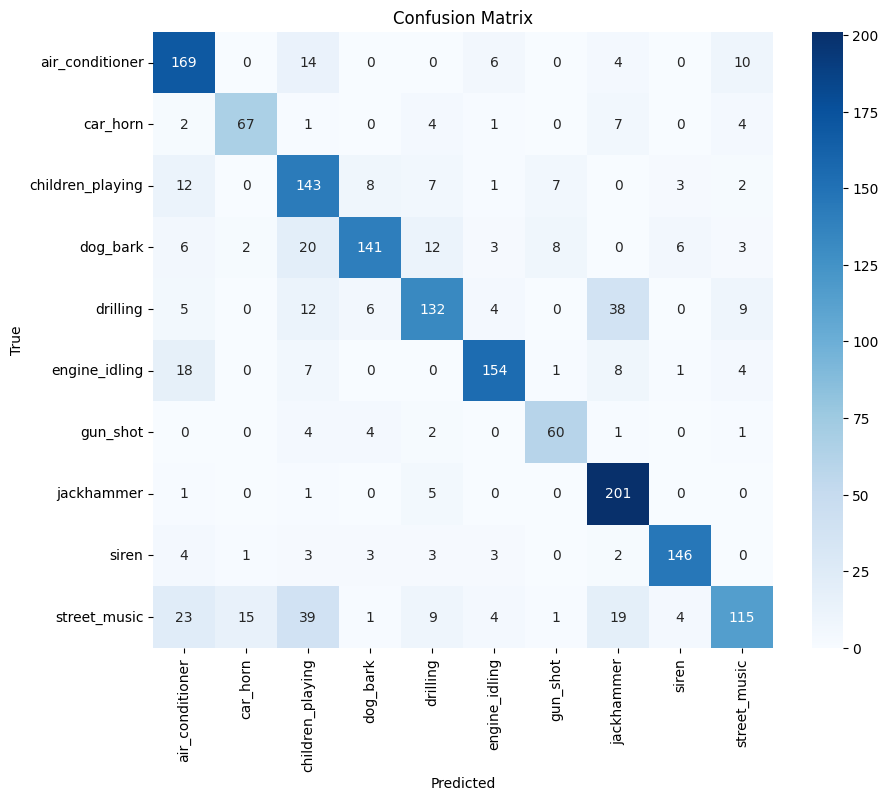

Classification Report:
                  precision    recall  f1-score   support

 air_conditioner       0.70      0.83      0.76       203
        car_horn       0.79      0.78      0.78        86
children_playing       0.59      0.78      0.67       183
        dog_bark       0.87      0.70      0.77       201
        drilling       0.76      0.64      0.69       206
   engine_idling       0.88      0.80      0.83       193
        gun_shot       0.78      0.83      0.81        72
      jackhammer       0.72      0.97      0.82       208
           siren       0.91      0.88      0.90       165
    street_music       0.78      0.50      0.61       230

        accuracy                           0.76      1747
       macro avg       0.78      0.77      0.77      1747
    weighted avg       0.77      0.76      0.76      1747



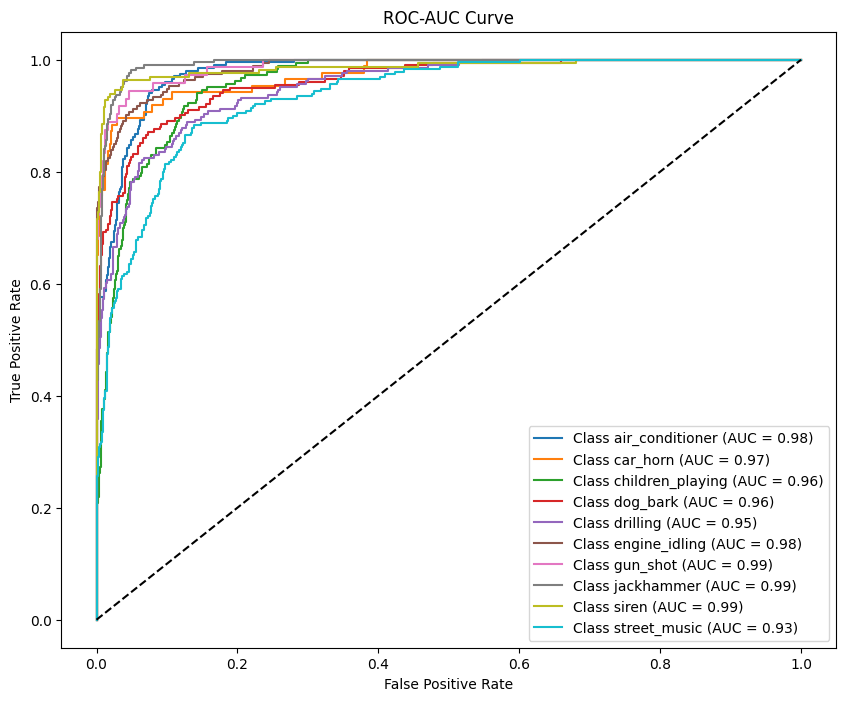

In [ ]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model

model_dialed = load_model('/content/drive/MyDrive/Urban_sound/models/best_dilated_model.keras')
# Assuming `model` is your trained model
# Predict the classes on the test set
y_pred = model_dialed.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report with F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Plot ROC-AUC Curve
# Binarize the labels for multi-class ROC-AUC
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot each class ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

# CRN
# test accuracy:72%

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input, GRU, TimeDistributed, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Reshape X to 4D for Conv2D input (samples, height, width, channels)
# Assuming X_train and X_test are your input features in the shape (num_samples, 40, 1)
X_train_cnn = X_train.reshape(X_train.shape[0], 40, 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 40, 1, 1)

# Model architecture
input_layer = Input(shape=(40, 1, 1))

# Convolutional Block
x = Conv2D(32, (3, 1), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 1), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 1))(x)
x = Dropout(0.3)(x)

# Reshape to fit into RNN
x = TimeDistributed(Flatten())(x)  # Flattening for GRU/LSTM input
x = TimeDistributed(Dense(64, activation='relu'))(x)  # Adding a Dense layer
x = Dropout(0.3)(x)

# Recurrent Layer (GRU or LSTM)
x = GRU(64, return_sequences=True)(x)
x = Dropout(0.4)(x)
x = GRU(32)(x)  # The final GRU layer

# Output Layer
output_layer = Dense(10, activation='softmax')(x)  # Adjust for the number of classes

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the file path to save the best model
best_model_save_path = '/content/drive/MyDrive/Urban_sound/models/best_crn_model.keras'

# Create the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(
    best_model_save_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model with the checkpoint callback
history = model.fit(
    X_train_cnn, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    callbacks=[checkpoint]
)

# Evaluate the best saved model
best_model = tf.keras.models.load_model(best_model_save_path)
loss, accuracy = best_model.evaluate(X_test_cnn, y_test)
print(f"Best CRN Model Test Loss: {loss}")
print(f"Best CRN Model Test Accuracy: {accuracy}")


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1378 - loss: 2.2667
Epoch 1: val_accuracy improved from -inf to 0.19748, saving model to /content/drive/MyDrive/Urban_sound/models/best_crn_model.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.1378 - loss: 2.2666 - val_accuracy: 0.1975 - val_loss: 2.2070
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1825 - loss: 2.1795
Epoch 2: val_accuracy improved from 0.19748 to 0.21122, saving model to /content/drive/MyDrive/Urban_sound/models/best_crn_model.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.1826 - loss: 2.1794 - val_accuracy: 0.2112 - val_loss: 2.0982
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2222 - loss: 2.0990
Epoch 3: val_accuracy improved from 0.21122 to 0.22210, saving model to /content/drive/MyDrive/Urban_sound/models/best_crn_model.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.2222 - loss: 2.0989 - val_accuracy: 0.2

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step


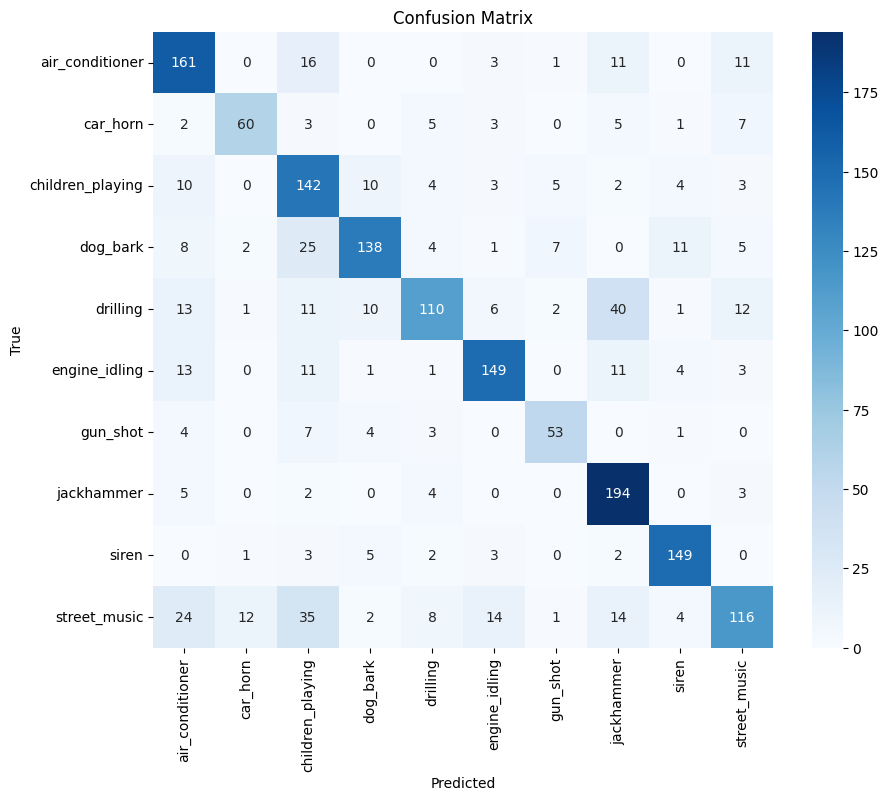

Classification Report:
                  precision    recall  f1-score   support

 air_conditioner       0.67      0.79      0.73       203
        car_horn       0.79      0.70      0.74        86
children_playing       0.56      0.78      0.65       183
        dog_bark       0.81      0.69      0.74       201
        drilling       0.78      0.53      0.63       206
   engine_idling       0.82      0.77      0.79       193
        gun_shot       0.77      0.74      0.75        72
      jackhammer       0.70      0.93      0.80       208
           siren       0.85      0.90      0.88       165
    street_music       0.72      0.50      0.59       230

        accuracy                           0.73      1747
       macro avg       0.75      0.73      0.73      1747
    weighted avg       0.74      0.73      0.72      1747



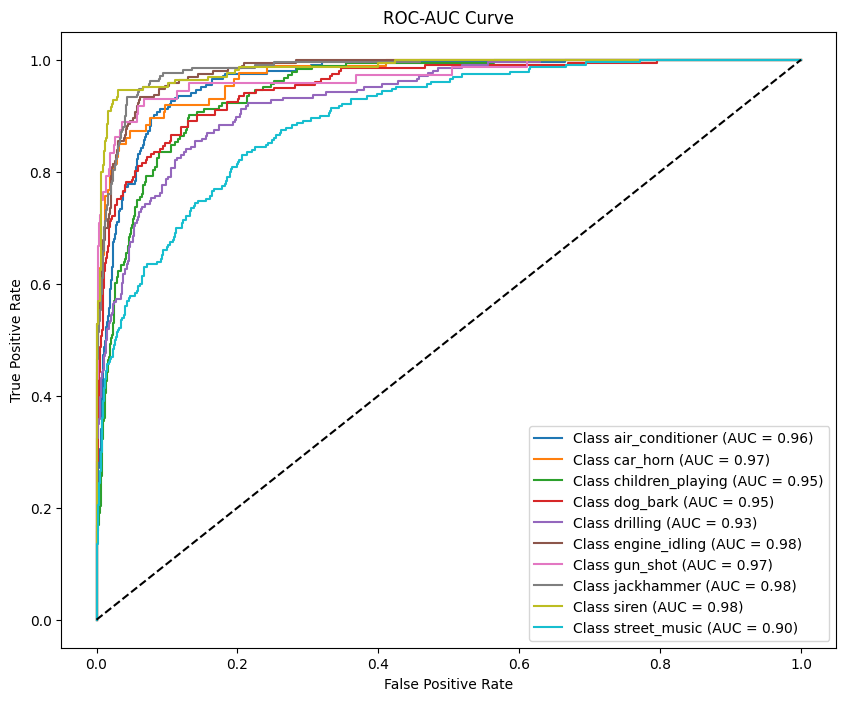

In [ ]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model

model_dialed = load_model('/content/drive/MyDrive/Urban_sound/models/best_crn_model.keras')
# Assuming `model` is your trained model
# Predict the classes on the test set
y_pred = model_dialed.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report with F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Plot ROC-AUC Curve
# Binarize the labels for multi-class ROC-AUC
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot each class ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

# CNN+Residual block
# test accuracy : 83%
# model_save :'/content/drive/MyDrive/Urban_sound/models/residual_net.keras'

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Input, add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Input shape
input_shape = (40, 1)  # Reshape input to include 1 channel for Conv1D

# Input layer
input_layer = Input(shape=input_shape)

# First Conv Block
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# First Residual Connection
residual = Conv1D(64, kernel_size=1, padding='same')(x)
x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)

# Adjust the residual connection to match the shape of `x`
residual = Conv1D(128, kernel_size=1, padding='same')(residual)
x = add([x, residual])  # Adding residual connection
x = Dropout(0.4)(x)

# Second Conv Block
residual = Conv1D(128, kernel_size=1, padding='same')(x)
x = Conv1D(256, kernel_size=3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)

# Adjust the residual connection to match the shape of `x`
residual = Conv1D(256, kernel_size=1, padding='same')(residual)
x = add([x, residual])  # Adding residual connection
x = Dropout(0.4)(x)

# Global Average Pooling
x = GlobalAveragePooling1D()(x)

# Dense Layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

# Output Layer
output_layer = Dense(10, activation='softmax')(x)  # Adjust output neurons as per the number of classes

# Model definition
model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train.reshape(-1, 40, 1), y_train, epochs=100, batch_size=32, validation_data=(X_test.reshape(-1, 40, 1), y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, 40, 1), y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 40, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 40, 64)         │            256 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 40, 64)         │            256 │ conv1d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 40, 64)         │         12,352 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 40, 64)         │            256 │ conv1d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 40, 64)         │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 40, 128)        │         24,704 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 40, 128)        │            512 │ conv1d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_9 (Conv1D)         │ (None, 40, 128)        │         49,280 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 40, 64)         │          4,160 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 40, 128)        │            512 │ conv1d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, 40, 128)        │          8,320 │ conv1d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 40, 128)        │              0 │ batch_normalization_7… │
│                           │                        │                │ conv1d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 40, 128)        │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 40, 256)        │         98,560 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 40, 256)        │          1,024 │ conv1d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 489,418 (1.87 MB)

 Trainable params: 487,626 (1.86 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 42s 141ms/step - accuracy: 0.1563 - loss: 2.2641 - val_accuracy: 0.1889 - val_loss: 2.1229
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 43s 150ms/step - accuracy: 0.2801 - loss: 1.9916 - val_accuracy: 0.3434 - val_loss: 1.8449
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 37s 133ms/step - accuracy: 0.3159 - loss: 1.8868 - val_accuracy: 0.3732 - val_loss: 1.7504
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 43s 141ms/step - accuracy: 0.3425 - loss: 1.8142 - val_accuracy: 0.4236 - val_loss: 1.6311
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 40s 136ms/step - accuracy: 0.3839 - loss: 1.7242 - val_accuracy: 0.4694 - val_loss: 1.5186
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 28s 129ms/step - accuracy: 0.3850 - loss: 1.7022 - val_accuracy: 0.5060 - val_loss: 1.4062
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 43s 136ms/step - accuracy: 0.4190 - loss: 1.6324 - val_accuracy: 0.5163 - val_loss: 1.3924
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - accuracy: 0.4432 -

In [ ]:
import os

# Define the file path where you want to save the model
model_save_path = '/content/drive/MyDrive/Urban_sound/models/residual_net.keras'

# Create the directory if it does not exist
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the entire model
model.save(model_save_path)
print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Urban_sound/models/residual_net.keras


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


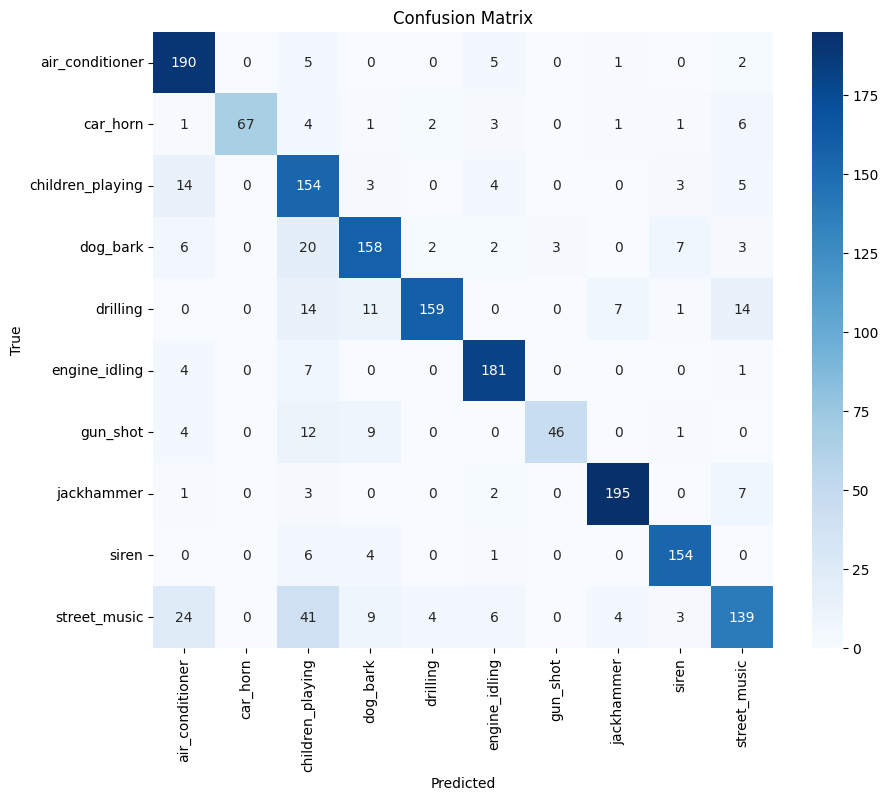

Classification Report:
                  precision    recall  f1-score   support

 air_conditioner       0.78      0.94      0.85       203
        car_horn       1.00      0.78      0.88        86
children_playing       0.58      0.84      0.69       183
        dog_bark       0.81      0.79      0.80       201
        drilling       0.95      0.77      0.85       206
   engine_idling       0.89      0.94      0.91       193
        gun_shot       0.94      0.64      0.76        72
      jackhammer       0.94      0.94      0.94       208
           siren       0.91      0.93      0.92       165
    street_music       0.79      0.60      0.68       230

        accuracy                           0.83      1747
       macro avg       0.86      0.82      0.83      1747
    weighted avg       0.84      0.83      0.83      1747



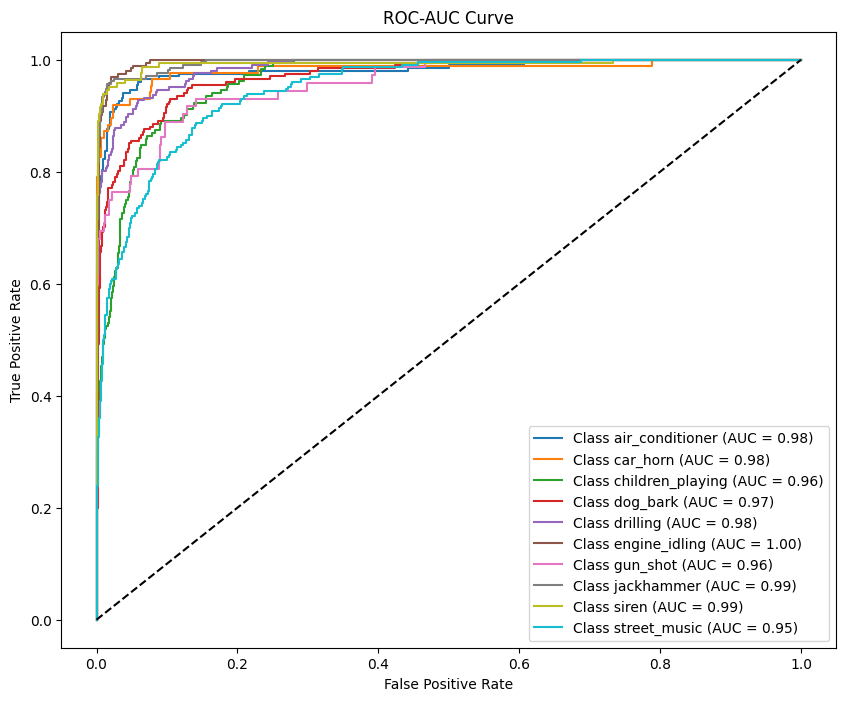

In [ ]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model

model_cnn = load_model('/content/drive/MyDrive/Urban_sound/models/cnn.keras')
# Assuming `model` is your trained model
# Predict the classes on the test set
y_pred = model_cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report with F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Plot ROC-AUC Curve
# Binarize the labels for multi-class ROC-AUC
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot each class ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

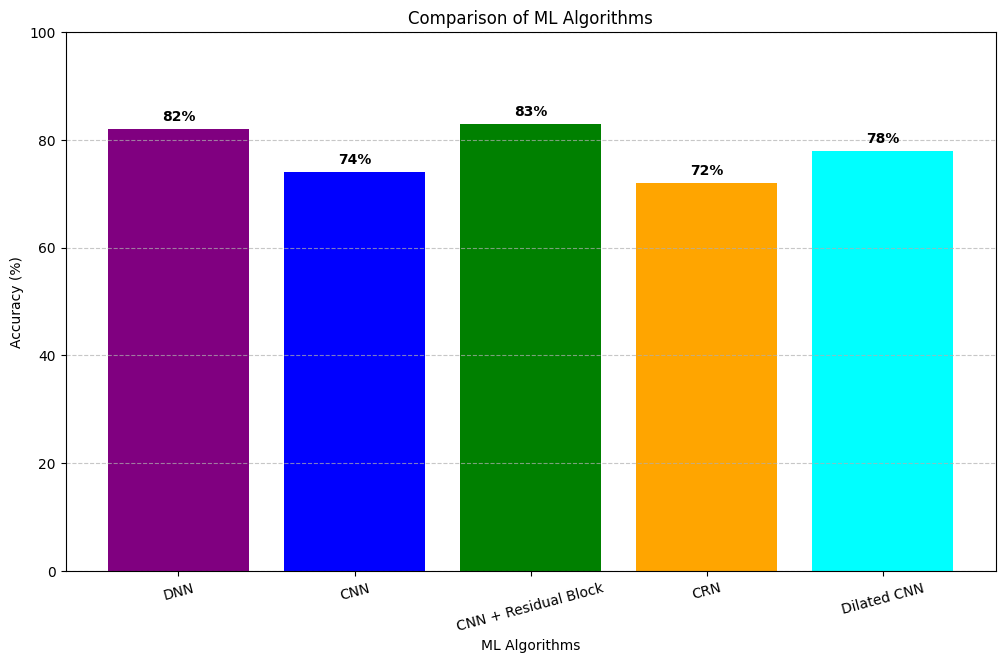

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracy values for each model (example values, replace with actual results)
accuracies = {
    'DNN': 82,
    'CNN': 74,
    'CNN + Residual Block': 83,
    'CRN': 72,
    'Dilated CNN': 78
}

# Extract model names and their accuracies
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Define colors for each model bar
colors = ['purple', 'blue', 'green', 'orange', 'cyan']

# Plot the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(models, accuracy_values, color=colors)

# Add accuracy labels on top of each bar
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"{acc}%", ha='center', va='bottom', color="black", fontweight="bold")

# Set labels and title
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of ML Algorithms")
plt.ylim(0, 100)  # Adjust y-axis limits to include all accuracy values
plt.xticks(rotation=15)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add horizontal grid lines for better readability
plt.show()


# DNN enhanced:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the DNN model
model = Sequential([
    Dense(2048, activation='relu', input_shape=(40,)),  # Increased neurons
    Dropout(0.4),
    Dense(1024, activation='relu'),  # Increased neurons
    Dropout(0.4),
    Dense(512, activation='relu'),  # Increased neurons
    Dropout(0.4),  # Increased dropout rate
    BatchNormalization(),
    Dense(256, activation='relu'),  # Increased neurons
    Dropout(0.4),  # Increased dropout rate
    BatchNormalization(),  # Added batch normalization
    Dense(128, activation='relu'),  # Increased neurons
    Dropout(0.4),  # Increased dropout rate
    BatchNormalization(),  # Added batch normalization
    Dense(64, activation='relu'),  # Increased neurons
    Dropout(0.4),  # Increased dropout rate
    Dense(32, activation='relu'),  # Increased neurons
    Dropout(0.3),  # Standard dropout
    Dense(10, activation='softmax')  # Adjust output neurons as per the number of classes
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 2048)                │          83,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,885,418 (11.01 MB)

 Trainable params: 2,883,626 (11.00 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.1239 - loss: 2.5903 - val_accuracy: 0.2330 - val_loss: 2.1308 - learning_rate: 0.0010
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.1749 - loss: 2.2144 - val_accuracy: 0.2541 - val_loss: 2.0645 - learning_rate: 0.0010
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.1834 - loss: 2.1625 - val_accuracy: 0.2215 - val_loss: 2.0280 - learning_rate: 0.0010
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.1969 - loss: 2.0970 - val_accuracy: 0.2026 - val_loss: 2.0291 - learning_rate: 0.0010
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.2046 - loss: 2.0823 - val_accuracy: 0.2358 - val_loss: 2.0019 - learning_rate: 0.0010
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.2071 - loss: 2.0447 - val_accuracy: 0.2410 - val_loss: 1.9708 - learning_rate: 0.0010
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.2350 - l

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


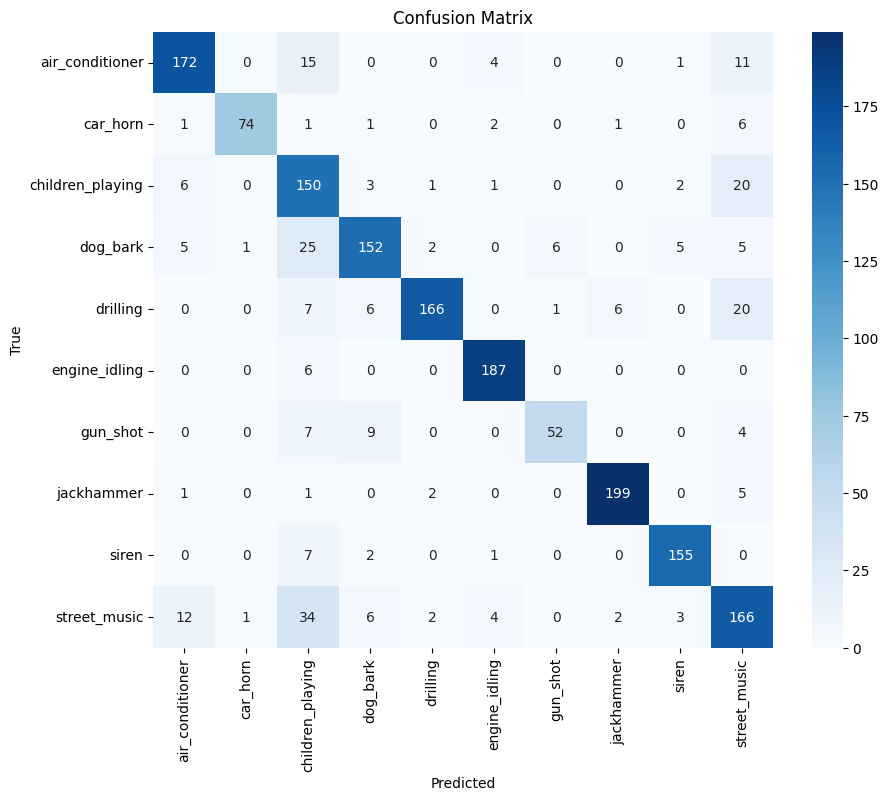

Classification Report:
                  precision    recall  f1-score   support

 air_conditioner       0.87      0.85      0.86       203
        car_horn       0.97      0.86      0.91        86
children_playing       0.59      0.82      0.69       183
        dog_bark       0.85      0.76      0.80       201
        drilling       0.96      0.81      0.88       206
   engine_idling       0.94      0.97      0.95       193
        gun_shot       0.88      0.72      0.79        72
      jackhammer       0.96      0.96      0.96       208
           siren       0.93      0.94      0.94       165
    street_music       0.70      0.72      0.71       230

        accuracy                           0.84      1747
       macro avg       0.87      0.84      0.85      1747
    weighted avg       0.86      0.84      0.85      1747



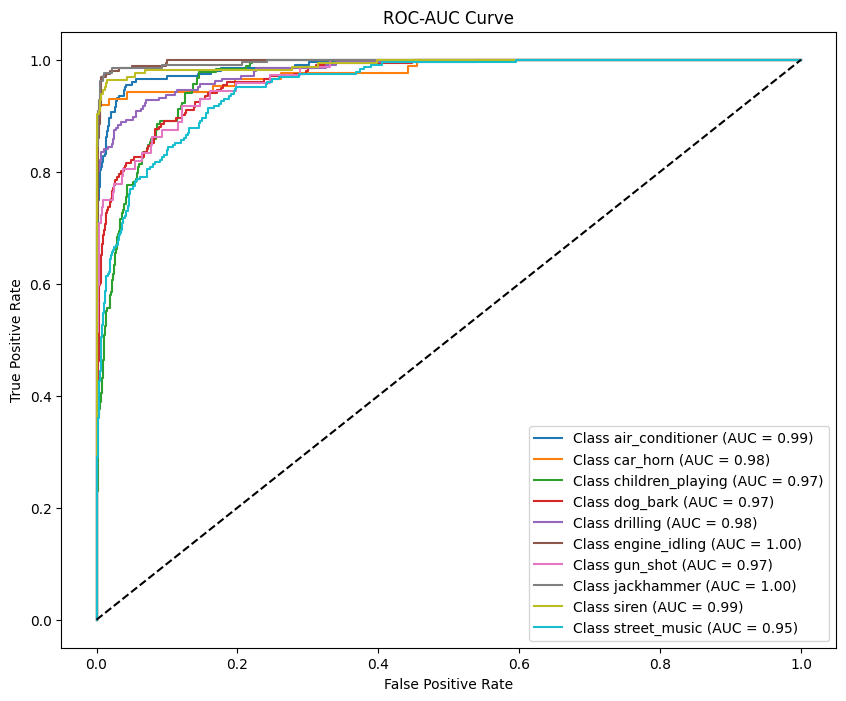

In [ ]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report with F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Plot ROC-AUC Curve
# Binarize the labels for multi-class ROC-AUC
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot each class ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

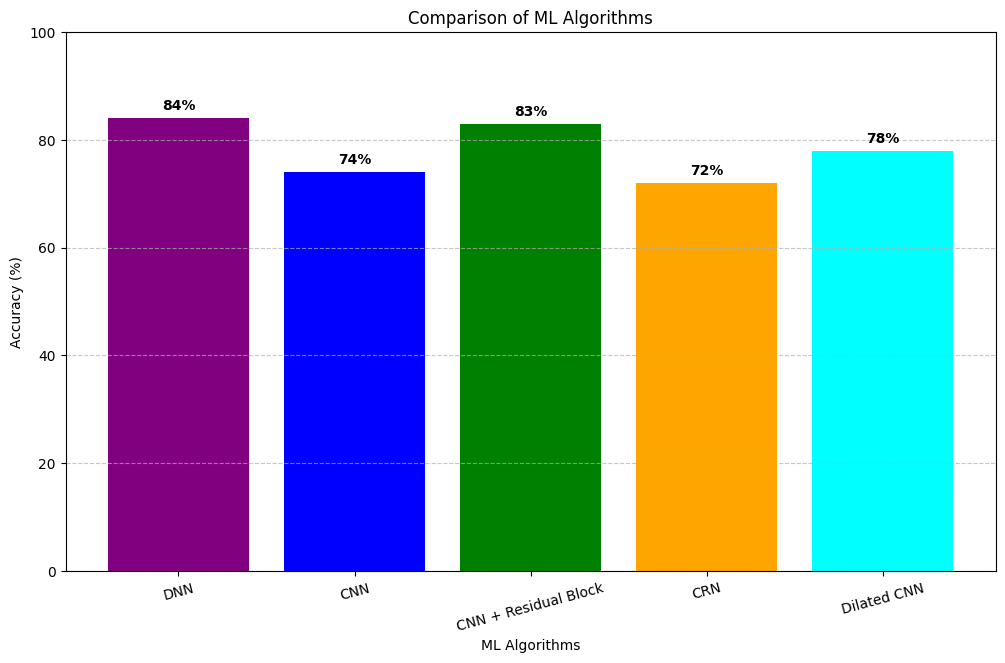

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracy values for each model (example values, replace with actual results)
accuracies = {
    'DNN': 84,
    'CNN': 74,
    'CNN + Residual Block': 83,
    'CRN': 72,
    'Dilated CNN': 78
}

# Extract model names and their accuracies
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Define colors for each model bar
colors = ['purple', 'blue', 'green', 'orange', 'cyan']

# Plot the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(models, accuracy_values, color=colors)

# Add accuracy labels on top of each bar
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"{acc}%", ha='center', va='bottom', color="black", fontweight="bold")

# Set labels and title
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of ML Algorithms")
plt.ylim(0, 100)  # Adjust y-axis limits to include all accuracy values
plt.xticks(rotation=15)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add horizontal grid lines for better readability
plt.show()